In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


In [3]:
df_new.dtypes

word                object
length               int64
arousal            float64
valence            float64
dominance          float64
concreteness       float64
imageability       float64
familiarity        float64
aoa                float64
semsize            float64
gender             float64
polysemy             int64
web_corpus_freq    float64
dtype: object

In [4]:
cols = [col for col in df_new.columns if col != 'word']    
cols = [col for col in cols if col != 'polysemy']          
cols = [col for col in cols if col != 'concreteness']      
cols = [col for col in cols if col != 'dominance']         
cols = [col for col in cols if col != 'familiarity']       
cols

['length',
 'arousal',
 'valence',
 'imageability',
 'aoa',
 'semsize',
 'gender',
 'web_corpus_freq']

In [5]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization #####
from sklearn import tree # export_graphviz() method
from IPython.display import Image # viz stuff
import pydotplus # viz stuff                     ## install
from IPython.display import Image # viz stuff

####################################

######## Evaluation #######                
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
####################################

# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation ## hold-out method alternative
from sklearn.model_selection import cross_val_score

# Train & Test

## Unbalanced Data

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [7]:
# Hold-out

X = df_new[cols].values
y = df_new['polysemy']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, 
                                        random_state = 100 ) #because it is a random split

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size = 0.3, 
                                                  random_state= 100, stratify = y_training)

print("df_new.shape :     ",df_new.shape)

print('-------------------------------------------')
print('Training Set')
print("X_train_or.shape : ",X_training.shape)

print('-------------------------------------------')
print('Test Set')
print("X_test.shape :     ",X_test.shape)

print('-------------------------------------------')
print('Training Set Count')
print('X iniziale: -------', X_training.shape, '\n y iniziale:', Counter(y_training))

print('-------------------------------------------')
print('Train Set')
print("X_train.shape :    ",X_train.shape)
print('X_train count: -------', X_train.shape, '\n y count:', Counter(y_train))

print('-------------------------------------------')
print('Validation Set')
print("X_val.shape :      ",X_val.shape)
print('X_val count: -------', X_val.shape, '\n y count:', Counter(y_val))

df_new.shape :      (4357, 13)
-------------------------------------------
Training Set
X_train_or.shape :  (3049, 8)
-------------------------------------------
Test Set
X_test.shape :      (1308, 8)
-------------------------------------------
Training Set Count
X iniziale: ------- (3049, 8) 
 y iniziale: Counter({0: 2789, 1: 260})
-------------------------------------------
Train Set
X_train.shape :     (2134, 8)
X_train count: ------- (2134, 8) 
 y count: Counter({0: 1952, 1: 182})
-------------------------------------------
Validation Set
X_val.shape :       (915, 8)
X_val count: ------- (915, 8) 
 y count: Counter({0: 837, 1: 78})


# Tuning the hyper-parameters

In [8]:
clf = DecisionTreeClassifier(#criterion='gini',
                             #max_depth=None ,
                             #min_samples_split=10,
                             #min_samples_leaf=5,
                            ) 
clf.fit(X_train, y_train)  ## on train set only
#clf.fit(X_train_or, y_train_or) ?

DecisionTreeClassifier()

In [9]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [10]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),    
             'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
             'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100], 
             'criterion': ['gini', 'entropy']
             }

In [11]:
grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X_train, y_train) ##### ASK !!
res = grid_search.cv_results_

In [12]:
report(res, n_top=3)
# ________Result_________
# Model with rank: 1
# Mean validation score: 0.250 (std: 0.041)
# Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.245 (std: 0.053)
Parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.244 (std: 0.036)
Parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.241 (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 2}



In [13]:
#grid_search.best_estimator_ # !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [14]:
random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=50, cv=4, random_state=42)
random_search.fit(X_train, y_train) ## OR X_training ??
res = grid_search.cv_results_

In [15]:
report(res, n_top=3)
# ________Result_________
# Model with rank: 1
# Mean validation score: 0.250 (std: 0.041)
# Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.245 (std: 0.053)
Parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.244 (std: 0.036)
Parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.241 (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 2}



In [16]:
#random_search.best_estimator_ # !!!!!!!!!!!!!!!!!!!!!!!!!!!

# Decision tree - build model

In [17]:
### decided by RandomizedSearchCV
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 12, min_samples_split=10, min_samples_leaf=5) 

# use GINI or ENTROPY to decide the split method (there are others but sklearn only has these)
# max_depth: at what level the tree should stop
# min_samples_split: minimum number of records in a node for it to be convenient to split
# min_samples_leaf: minimum number of records acceptable in children to be convenient for splitting

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       min_samples_split=10)

In [18]:
clf.feature_importances_

array([0.19237047, 0.11654226, 0.08418822, 0.08872291, 0.08954229,
       0.14463782, 0.10079034, 0.18320569])

In [19]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(cols)}
imp_dict

{'length': 0.1923704707177788,
 'arousal': 0.11654226024973008,
 'valence': 0.08418822028803162,
 'imageability': 0.0887229132143442,
 'aoa': 0.08954228922974934,
 'semsize': 0.14463781810889428,
 'gender': 0.1007903357886383,
 'web_corpus_freq': 0.1832056924028335}

In [20]:
# Order by Importance
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)} 

{'length': 0.1923704707177788,
 'web_corpus_freq': 0.1832056924028335,
 'semsize': 0.14463781810889428,
 'arousal': 0.11654226024973008,
 'gender': 0.1007903357886383,
 'aoa': 0.08954228922974934,
 'imageability': 0.0887229132143442,
 'valence': 0.08418822028803162}

Text(0.5, 1.0, 'Feature Importance')

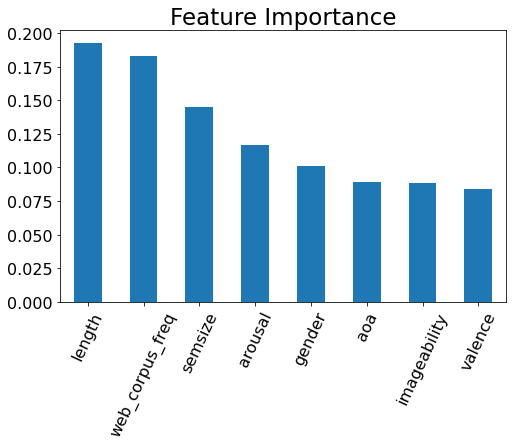

In [21]:
pd.Series(clf.feature_importances_,  
         index = cols).sort_values(ascending = False).plot(kind = 'bar', figsize = (8,5), fontsize = 16, rot = 65);
plt.title('Feature Importance', fontsize = 23)
#plt.savefig(os.path.join('FeatureImportance.png'), dpi=300, format='png', bbox_inches='tight')

In [22]:
clf.classes_ # polysemy 0 and 1

array([0, 1], dtype=int64)

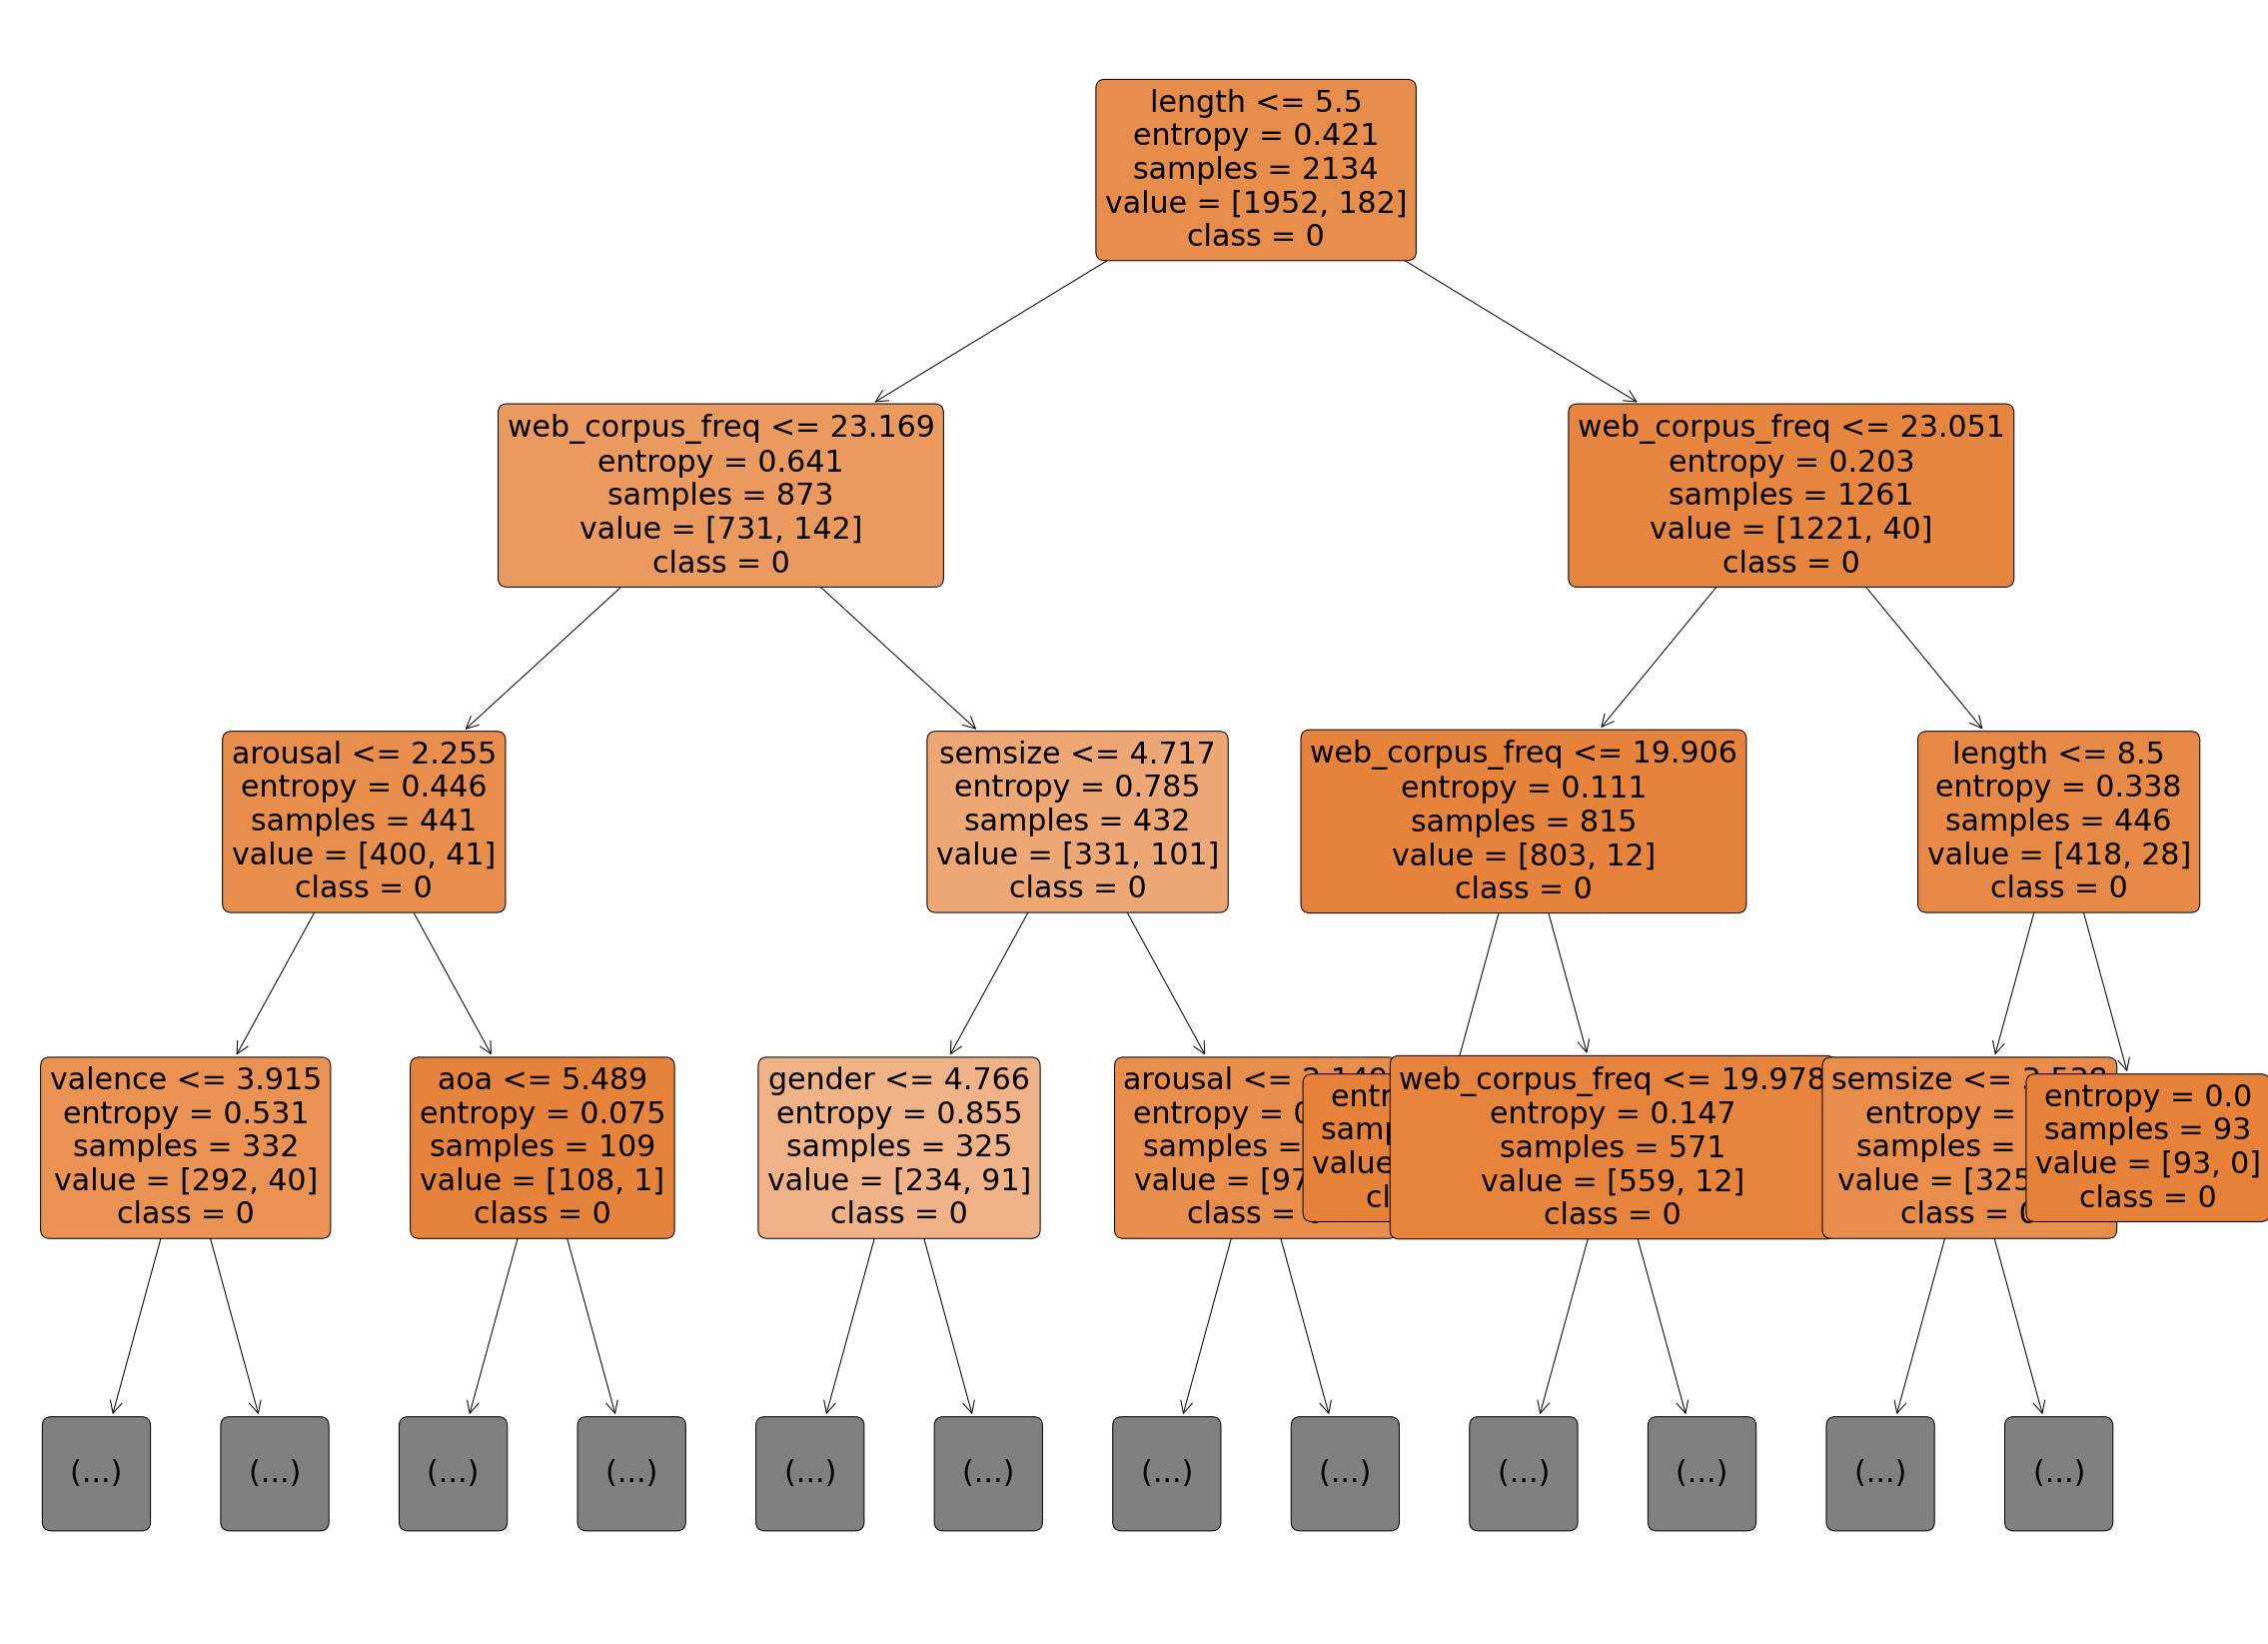

In [156]:
fig, ax = plt.subplots(figsize=(40, 30))    

tree.plot_tree                 (clf,               # this is for the following plot
                                feature_names= cols, 
                                class_names=[str(v) for v in clf.classes_], 
                                filled=True, rounded=True,  
                                impurity= True ,
                                fontsize = 30,  # change this to change fontsize in the node
                                max_depth=3)    # change this value to change the level of tree
plt.show()

In [23]:
from graphviz import Digraph
import pydotplus
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

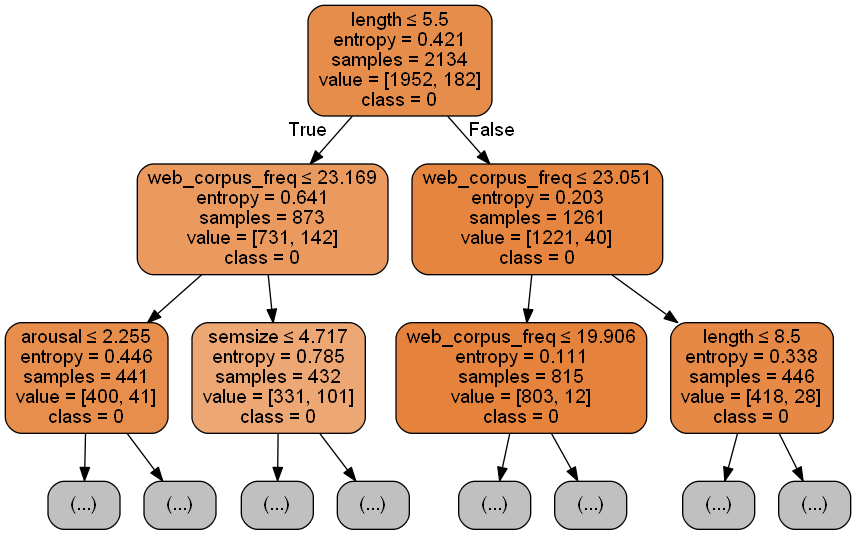

In [24]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=cols,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                #fontsize = 30,
                                max_depth=2
                                )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#plt.savefig(os.path.join('DecisionTree.png'), dpi=300, format='png', bbox_inches='tight')

# MODEL EVALUATION

## ACCURACY

In [159]:
y_pred = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)
y_pred[:5], y_pred_val[:5], y_pred_test[:5]

(array([0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64))

In [160]:
y_train.values[:5], y_val.values[:5], y_test.values[:5]

(array([0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64),
 array([1, 0, 0, 0, 0], dtype=int64))

In [161]:
# predict probability 
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob_val = clf.predict_proba(X_val)
y_pred_prob_test = clf.predict_proba(X_test)
y_pred_prob[:5], y_pred_prob_val[:5], y_pred_prob_test[:5]

(array([[0.90625   , 0.09375   ],
        [1.        , 0.        ],
        [0.75      , 0.25      ],
        [0.83333333, 0.16666667],
        [1.        , 0.        ]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[0.73493976, 0.26506024],
        [0.73493976, 0.26506024],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ]]))

###  ALL - Train/Val/Test

In [162]:
print('DT Classifier on Unbalanced Data')
print('_________________________________________________________________')
print('TRAIN Accuracy', accuracy_score(y_train, y_pred))
print('TRAIN F1-score', f1_score(y_train, y_pred, average=None))
print('TRAIN F1-score', f1_score(y_train, y_pred))
print( classification_report(y_train, y_pred) )
confusion_matrix(y_train, y_pred, labels=[1,0])

print('_________________________________________________________________')
print('VALIDATION Accuracy %s' % accuracy_score(y_val, y_pred_val))
print('VALIDATION F1-score %s' % f1_score(y_val, y_pred_val, average=None))
print(classification_report(y_val, y_pred_val))
confusion_matrix(y_val, y_pred_val, labels=[1,0])

print('_________________________________________________________________')
print('TEST Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('TEST F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test, labels=[1,0])

confusion_matrix(y_val, y_pred_val)

DT Classifier on Unbalanced Data
_________________________________________________________________
TRAIN Accuracy 0.943767572633552
TRAIN F1-score [0.96966633 0.61538462]
TRAIN F1-score 0.6153846153846154
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1952
           1       0.74      0.53      0.62       182

    accuracy                           0.94      2134
   macro avg       0.85      0.76      0.79      2134
weighted avg       0.94      0.94      0.94      2134

_________________________________________________________________
VALIDATION Accuracy 0.8961748633879781
VALIDATION F1-score [0.94434681 0.22764228]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       837
           1       0.31      0.18      0.23        78

    accuracy                           0.90       915
   macro avg       0.62      0.57      0.59       915
weighted avg       0.87      0.90      0.88    

array([[806,  31],
       [ 64,  14]], dtype=int64)

## CONFUSION MATRIX

In [165]:
# SUGGESTED FOR THE PROJECT
#    TP,       FN,        FP,       TN
# cf[0][0], cf[0][1], cf[1][0], cf[1][1]

cf = confusion_matrix(y_train, y_pred, labels=[1,0])
cf

array([[  96,   86],
       [  34, 1918]], dtype=int64)

In [166]:
# to normalize
cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
cf

array([[0.04498594, 0.04029991],
       [0.01593252, 0.89878163]])

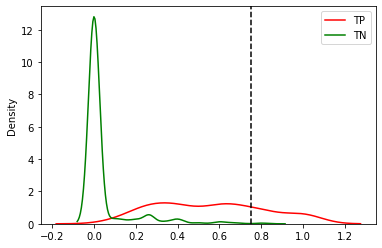

In [167]:
# KDEPLOTS just for understanding how a threshold work:
# green line to the right of the threshold are FPs
# red line to the left of the threshold are FNs

import seaborn as sns

# on TRAIN set
sns.kdeplot(y_pred_prob[:,1][y_train == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob[:,1][y_train == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

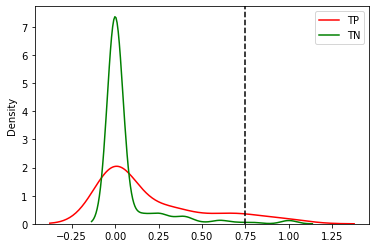

In [168]:
# on VALIDATION set
sns.kdeplot(y_pred_prob_val[:,1][y_val == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob_val[:,1][y_val == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

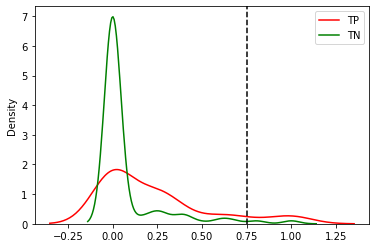

In [169]:
# on TEST set
sns.kdeplot(y_pred_prob_test[:,1][y_test == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob_test[:,1][y_test == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

Confusion matrix, without normalization
[[  96   86]
 [  34 1918]]
Normalized confusion matrix ('all')
[[0.04498594 0.04029991]
 [0.01593252 0.89878163]]
Normalized confusion matrix ('true')
[[0.52747253 0.47252747]
 [0.01741803 0.98258197]]


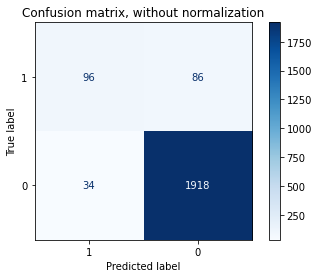

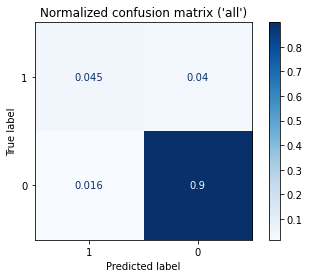

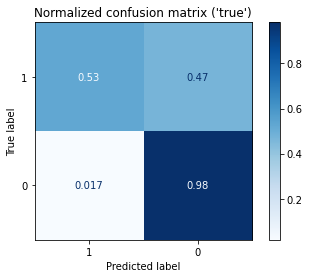

In [170]:
#CONFUSION MATRIX TRAIN SET
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[ 14  64]
 [ 31 806]]
Normalized confusion matrix ('all')
[[0.01530055 0.06994536]
 [0.03387978 0.88087432]]
Normalized confusion matrix ('true')
[[0.17948718 0.82051282]
 [0.03703704 0.96296296]]


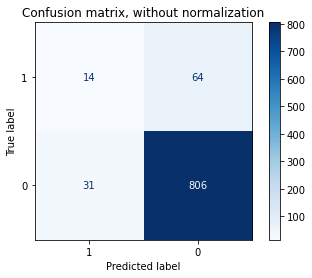

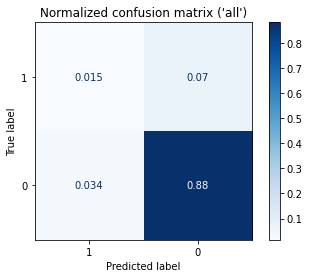

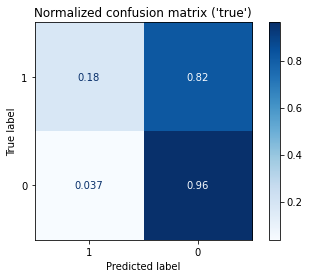

In [171]:
#CONFUSION MATRIX VALIDATION SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[  19   92]
 [  55 1142]]
Normalized confusion matrix ('all')
[[0.01452599 0.07033639]
 [0.04204893 0.87308869]]
Normalized confusion matrix ('true')
[[0.17117117 0.82882883]
 [0.0459482  0.9540518 ]]


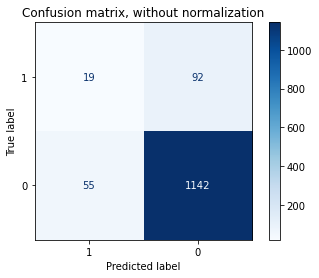

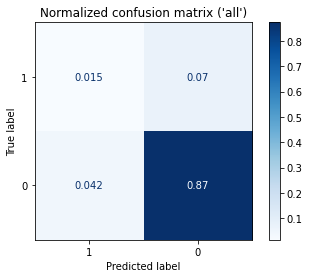

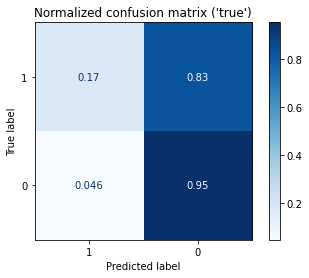

In [148]:
#CONFUSION MATRIX TEST SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## ROC CURVES 

In [172]:
from sklearn.preprocessing import LabelBinarizer

In [173]:
# binarizing VALIDATION
lb = LabelBinarizer()
bina_y_val = lb.fit(y_val)
bina_y_pred_val = lb.fit(y_pred_val)
print("Polysemy", lb.classes_.tolist())

bina_y_val = lb.transform(y_val)
bina_y_pred_val = lb.transform(y_pred_val)

fpr, tpr, th = roc_curve(bina_y_val, bina_y_pred_val, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_val, bina_y_pred_val, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.5712250712250713
Average: 0.5712250712250713


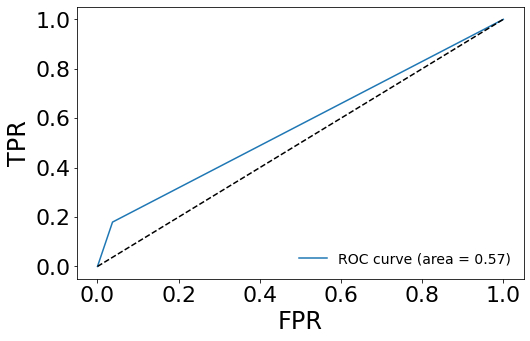

In [174]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

## Dotted line represents the threshold 

In [175]:
# binarizing TRAIN 
lb = LabelBinarizer()
bina_y_train = lb.fit(y_train)
bina_y_pred_train = lb.fit(y_pred)
print("Polysemy", lb.classes_.tolist())

bina_y_train = lb.transform(y_train)
bina_y_pred_train = lb.transform(y_pred)

fpr, tpr, th = roc_curve(bina_y_train, bina_y_pred_train, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_train, bina_y_pred_train, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.755027247342821
Average: 0.755027247342821


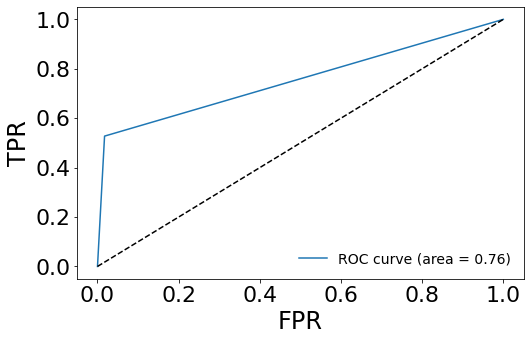

In [176]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [177]:
# binarizing TEST
lb = LabelBinarizer()
bina_y_test = lb.fit(y_test)
bina_y_pred_test = lb.fit(y_pred_test)
print("Polysemy", lb.classes_.tolist())

bina_y_test = lb.transform(y_test)
bina_y_pred_test = lb.transform(y_pred_test)

fpr, tpr, th = roc_curve(bina_y_test, bina_y_pred_test, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_test, bina_y_pred_test, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.5596875070559281
Average: 0.5596875070559281


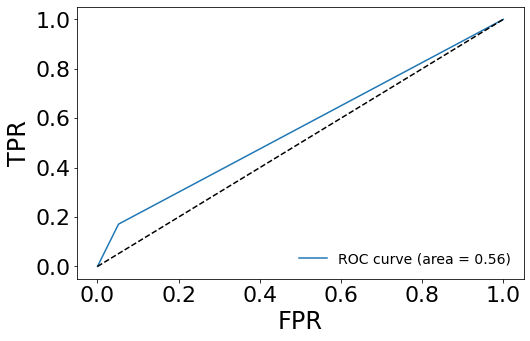

In [178]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

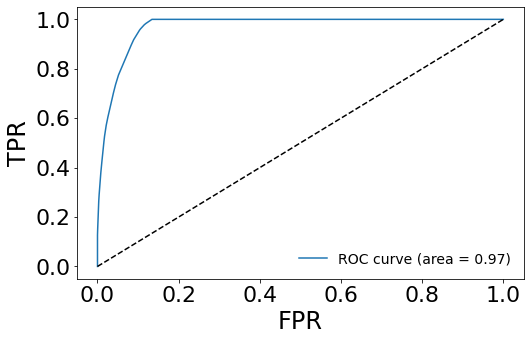

In [179]:
# on TRAIN set
fpr, tpr, th = roc_curve(y_train, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

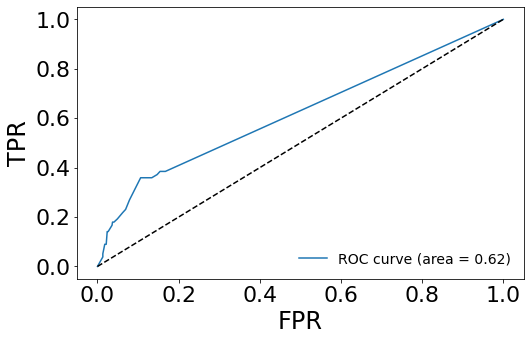

In [180]:
# on VALIDATION set
fpr, tpr, th = roc_curve(y_val, y_pred_prob_val[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

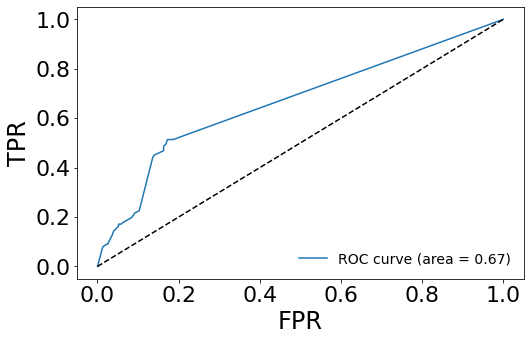

In [181]:
# on TEST set
fpr, tpr, th = roc_curve(y_test, y_pred_prob_test[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

# BONUS - CONFUSION MATRIX movie

In [ ]:
import seaborn as sns
for i, th in enumerate(np.arange(0,1.05,0.05)):
    if th==1:
        y_pred = [1 if v > th else 0 for v in clf.predict_proba(X_train)[:,1]]
    else:
        y_pred = [1 if v >= th else 0 for v in clf.predict_proba(X_train)[:,1]]
    cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
    print(cf)
    
    fig, ax = plt.subplots(figsize=(6,4)) 
    sns.heatmap(cf, annot=True, annot_kws={"size": 40}, linewidths=4, cmap="Blues")
    
    ax.set_xticklabels(['Positive','Negative'], fontsize=20)
    ax.set_xlabel('Predicted Class', fontsize=20)
    ax.set_yticklabels(['Positive','Negative'], fontsize=20)
    ax.set_ylabel('True Class', fontsize=20)
    
    plt.title('threshold ' + str(th)[:4], fontsize=30)
    #specify your path
    #plt.savefig(r"C:\Users\user\OneDrive\Desktop\2021-2022\Data Mining\Report\PNGs\Matrix" + str(i) + ".png")
    plt.show()

In [ ]:
### # CREATE A GIF OF THE VARYING CONFUSION MATRIX
### 
### import imageio
### 
### filenames = []
### for i, th in enumerate(np.arange(0,1.05,0.05)):
###     #specify your path
###     filename = r"C:\Users\user\OneDrive\Desktop\2021-2022\Data Mining\Report\PNGs\Matrix" + str(i) + ".png"
###     filenames.append(filename)
### 
### images = []
### for filename in filenames:
###     images.append(imageio.imread(filename))
###     
### imageio.mimsave('movie.mp4', images, fps=1.5)

## CROSS VALIDATION

In [ ]:
# Training Set
scores_cross = cross_val_score(clf, X_training, y_training, cv=4, scoring='f1')
scores_cross.mean(), scores_cross.std()

In [ ]:
# On the initial train (total) set
scores_accuracy_cross = cross_val_score(clf, X_train, y_train, cv=4)
print('TRAIN Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_cross.mean(), scores_accuracy_cross.std() * 2))

scores_f1_cross = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')
print('TRAIN F1-score: %0.4f (+/- %0.2f)' % (scores_f1_cross.mean(), scores_f1_cross.std() * 2))

# On the initial training set
scores_accuracy_cross = cross_val_score(clf, X_training, y_training, cv=4)
print('TRAINING Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_cross.mean(), scores_accuracy_cross.std() * 2))

scores_f1_cross = cross_val_score(clf, X_training, y_training, cv=4, scoring='f1_macro')
print('TRAINING F1-score: %0.4f (+/- %0.2f)' % (scores_f1_cross.mean(), scores_f1_cross.std() * 2))

In [ ]:
scores_accuracy_cross

In [ ]:
scores_f1_cross

## LEARNING CURVE

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
bina_y = lb.transform(y_training)
bina_y_train = lb.transform(y_train)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_1.fit(X_train, bina_y_train)
    training_error.append(mse(bina_y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_2.fit(X_train, bina_y_train)
    testing_error.append(mse(bina_y_val, model_2.predict(X_val)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Train error')
plt.xlabel('Tree depth', fontsize = 22)
plt.ylabel('MSE', fontsize = 24) # Mean squared error
plt.title('LEARNING CURVE', pad=15, size=24)
#plt.axvline(x=11, color='orange', linestyle='--')
plt.legend()

In [ ]:
bina_y = lb.transform(y_training)
bina_y_test = lb.transform(y_test)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_1.fit(X_training, bina_y)
    training_error.append(mse(bina_y, model_1.predict(X_training)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_2.fit(X_test, bina_y_test)
    testing_error.append(mse(bina_y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Test error')
plt.xlabel('Tree depth', fontsize = 22)
plt.ylabel('MSE', fontsize = 24) # Mean squared error
plt.title('LEARNING CURVE', pad=15, size=24)
#plt.axvline(x=11, color='orange', linestyle='--')
plt.legend()

# DUMMY CLASSIFIER

In [ ]:
#dummy_clf = DummyClassifier(strategy='constant', constant=1) # strategy = constant = 1 means that I consider threshold = 1
#dummy_clf.fit(X_test, y_test)
#
#y_pred_test_dummy = dummy_clf.predict(X_test)

In [ ]:
#cf_dummy = confusion_matrix(y_test, y_pred_test_dummy, labels=[1,0])
#cf_dummy

In [ ]:
#print(classification_report(y_test, y_pred_test_dummy))

# Random Forest Classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [184]:
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [10, 15, 20, 30, 50, 100, 150],
              'min_samples_leaf': [5, 10, 15, 20, 30, 50, 100, 150],
              'criterion': ['gini', 'entropy']}

In [185]:
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_list, n_iter=100, cv=4)
random_search.fit(X_train, y_train)
res = random_search.cv_results_
report(res, n_top=3)

# ______RESULT______
# Model with rank: 1
# Mean validation score: 0.916 (std: 0.001)
# Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 29, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.916 (std: 0.001)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 29, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.915 (std: 0.002)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 21, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.915 (std: 0.001)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 15, 'max_depth': 14, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.915 (std: 0.001)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.915 (std: 0.001)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 26, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.915 (std: 0.001)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 47, 'criterion': 'gini'}

Model with rank: 3
Me

In [ ]:
random_search.best_estimator_

In [ ]:
# grid_search = GridSearchCV(clf_rf, param_grid=param_list, scoring='f1')
# grid_search.fit(X_train, y_train) ##### ASK !!
# res = grid_search.cv_results_
# ______RESULT_____

In [ ]:
#grid_search.best_estimator_

In [187]:
clf_rf= RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=28,
                               min_samples_split=10, min_samples_leaf=5, class_weight=None)
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_train)
y_pred_val_rf = clf_rf.predict(X_val)
y_pred_test_rf = clf_rf.predict(X_test)


print('RF Classifier [Unbalanced data] (depth=28, samples_leaf=5, samples_split=10)')
print('_________________________________________________________________')
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_rf))
print('Train F1-score %s' % f1_score(y_train, y_pred_rf, average=None))
print(classification_report(y_train, y_pred_rf))

print('_________________________________________________________________')
print('Validation Accuracy %s' % accuracy_score(y_val, y_pred_val_rf))
print('Validation F1-score %s' % f1_score(y_val, y_pred_val_rf, average=None))
print(classification_report(y_val, y_pred_val_rf))

print('_________________________________________________________________')
print('Test Accuracy %s' % accuracy_score(y_test, y_pred_test_rf))
print('Test F1-score %s' % f1_score(y_test, y_pred_test_rf, average=None))
print(classification_report(y_test, y_pred_test_rf))

confusion_matrix(y_val, y_pred_val_rf)

RF Classifier [Unbalanced data] (depth=28, samples_leaf=5, samples_split=10)
_________________________________________________________________
Train Accuracy 0.930178069353327
Train F1-score [0.96323711 0.30697674]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1952
           1       1.00      0.18      0.31       182

    accuracy                           0.93      2134
   macro avg       0.96      0.59      0.64      2134
weighted avg       0.94      0.93      0.91      2134

_________________________________________________________________
Validation Accuracy 0.9136612021857924
Validation F1-score [0.95488292 0.        ]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       837
           1       0.00      0.00      0.00        78

    accuracy                           0.91       915
   macro avg       0.46      0.50      0.48       915
weighted avg       0.84      0.91    

array([[836,   1],
       [ 78,   0]], dtype=int64)

In [ ]:
#CONFUSION MATRIX TRAIN
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_score_rf = clf_rf.predict_proba(X_val)
b_y_val = lb.transform(y_val)
b_y_pred = lb.transform(y_pred_val_rf)
fpr, tpr, _ = roc_curve(b_y_val, b_y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(b_y_val, b_y_pred, average=None)
roc_auc

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [ ]:
scores_accuracy_rf = cross_val_score(clf_rf, X_train, y_train, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_rf.mean(), scores_accuracy_rf.std() * 2))

scores_f1_rf = cross_val_score(clf_rf, X_train, y_train, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1_rf.mean(), scores_f1_rf.std() * 2))

# KNeighborsClassifier (KNN)

In [ ]:
#clf = KNeighborsClassifier(n_neighbors=5)
#clf.fit(X, y)

# hold-out, cv, etc...

In [ ]:
neighbors = []
cv_scores = []  
# perform 10 fold cross validation
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores_kn = cross_val_score(knn, X_train, y_train, cv = 4, scoring = 'accuracy')  
    cv_scores.append(scores_kn.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors', fontsize = 20)  
plt.ylabel('Misclassification Error', fontsize = 20)  
plt.show() 

In [ ]:
clf_kn = KNeighborsClassifier(n_neighbors=5, weights= 'uniform') 
clf_kn.fit(X_train,y_train)

y_pred_knn = clf_kn.predict(X_train)
y_pred_val_knn = clf_kn.predict(X_val)

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_knn))
print('Train F1-score %s' % f1_score(y_train, y_pred_knn, average=None))
print(classification_report(y_train, y_pred_knn))

print('Test Accuracy %s' % accuracy_score(y_val, y_pred_val_knn))
print('Test F1-score %s' % f1_score(y_val, y_pred_val_knn, average=None))
print(classification_report(y_val, y_pred_val_knn))

scores_accuracy_kn = cross_val_score(clf_kn, X_training, y_training, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_kn.mean(), scores_accuracy_kn.std() * 2))

scores_f1_kn = cross_val_score(clf_kn, X_training, y_training, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1_kn.mean(), scores_f1_kn.std() * 2))

In [ ]:
#CONFUSION MATRIX TRAIN SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#CONFUSION MATRIX VALIDATION SET
titles_options =[("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Testing Decision Tree on Test set

In [ ]:
y_pred_or_fn = clf_rf.predict(X_training)

In [ ]:
y_pred_test_fn = clf_rf.predict(X_test)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test_fn))
print('F1-score %s' % f1_score(y_test, y_pred_test_fn, average=None))
print(classification_report(y_test, y_pred_test_fn))
confusion_matrix(y_test, y_pred_test_fn)

In [ ]:
titles_options =[("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()